# Ejercicio 1 - Análisis Exploratorio y Preprocesamiento de Datos

<hr width="50%" align="left"/>
<br/>

## **Grupo 09**

## Integrantes:

<p>
<img align="left" src="https://github.com/mmaddalena.png" height=50 width=50 />

### [Martin Andres Maddalena](https://github.com/mmaddalena) (107610)
<br/>
</p>

<p>
<img align="left" src="https://github.com/Petroshka00.png" height=50 width=50 />

### [Tomas Petrocini](https://github.com/Petroshka00) (110157)
<br/>
</p>

<p>
<img align="left" src="https://github.com/mateozorzi.png" height=50 width=50 />

### [Mateo Zorzi](https://github.com/mateozorzi) (109634)
<br/>
</p>

<p>
<img align="left" src="https://github.com/AlanRichmond" height=50 width=50 />

### [Alan Richmond](https://github.com/AlanRichmond) (106783)
<br/>
</p>

<p>
<img align="left" src="https://github.com/gbigolin.png" height=50 width=50 />

### [Gianella Bigolin](https://github.com/gbigolin) (108659)
<br/>
</p>

<hr width="50%" align="left"/>
<br/>


# Imports Generales

imports de la librerias a utilizar

In [ ]:
# Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

# Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

# Para trabajar con formato parquet
import pyarrow.parquet as pq

# Para chequear que los datasets ya estan importados
import os

!pip install gdown
import gdown

!pip install shap
import shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 26.4 MB/s eta 0:00:00


# Import Datasets

Si se quiere hacer la descarga de todos los archivos

## Julio

In [ ]:
# usamos la copia del dataset que se encuentra subido en el repositorio del grupo
if not os.path.exists("yellow_tripdata_2024-07.parquet"):
  !wget https://github.com/mmaddalena/TA047R-2C2025-GRUPO09/raw/refs/heads/main/TP1/datasets/ej1/yellow_tripdata_2024-07.parquet
dataset_julio = pq.read_table("yellow_tripdata_2024-07.parquet")
dataset_julio = dataset_julio.to_pandas()

## Agosto

In [ ]:
if not os.path.exists("yellow_tripdata_2024-08.parquet"):
  !wget https://github.com/mmaddalena/TA047R-2C2025-GRUPO09/raw/refs/heads/main/TP1/datasets/ej1/yellow_tripdata_2024-08.parquet
dataset_agosto = pq.read_table("yellow_tripdata_2024-08.parquet")
dataset_agosto = dataset_agosto.to_pandas()

## Septiembre

In [ ]:
if not os.path.exists("yellow_tripdata_2024-09.parquet"):
  !wget https://github.com/mmaddalena/TA047R-2C2025-GRUPO09/raw/refs/heads/main/TP1/datasets/ej1/yellow_tripdata_2024-09.parquet
dataset_septiembre = pq.read_table("yellow_tripdata_2024-09.parquet")
dataset_septiembre = dataset_septiembre.to_pandas()

## Taxi zones

In [ ]:
if not os.path.exists("taxi_zone_lookup.csv"):
  !wget https://raw.githubusercontent.com/mmaddalena/TA047R-2C2025-GRUPO09/refs/heads/main/TP1/datasets/ej1/taxi_zone_lookup.csv
zones = pd.read_csv("taxi_zone_lookup.csv")
zones

## Unificamos los datasets

In [ ]:
dataset = pd.concat([dataset_julio,dataset_agosto,dataset_septiembre],axis=0, ignore_index=True)
dataset.tail()

Vinculamos el dataset original con las zonas, creando nuevas variables a aprtir de la relacion entre los dos datasets.

`PULocationID` -> `PUBorough`, `PUZone`

`DOLocationID` -> `DOBorough`, `DOZone`

In [ ]:
new_dataset = dataset.merge(right=zones, left_on="PULocationID", right_on="LocationID", how="left")
new_dataset.drop(["PULocationID", "LocationID", "service_zone"], axis=1, inplace=True)
new_dataset.rename(columns={"Borough": "PUBorough", "Zone": "PUZone"}, inplace=True)

new_dataset = new_dataset.merge(right=zones, left_on="DOLocationID", right_on="LocationID", how="left")
new_dataset.drop(["DOLocationID", "LocationID", "service_zone"], axis=1, inplace=True)
new_dataset.rename(columns={"Borough": "DOBorough", "Zone": "DOZone"}, inplace=True)
new_dataset

In [ ]:
new_dataset.to_parquet("dataset_con_taxi_zones.parquet")

# Descargar Dataset

Se descarga el dataset ya configurado para utilizar



In [ ]:
url = 'https://drive.google.com/file/d/1i6dRTBXb6TXWcnnieCNzubKhVfk4CqR8/view?usp=drive_link'
output_path = 'dataset_con_taxi_zones.parquet'
gdown.download(url, output_path, quiet=False,fuzzy=True)

dataset = pq.read_table("dataset_con_taxi_zones.parquet")
dataset = dataset.to_pandas()
dataset

Downloading...
From (original): https://drive.google.com/uc?id=1i6dRTBXb6TXWcnnieCNzubKhVfk4CqR8
From (redirected): https://drive.google.com/uc?id=1i6dRTBXb6TXWcnnieCNzubKhVfk4CqR8&confirm=t&uuid=f451f5f1-5fc2-4dcc-b521-7a021e7dd0b0
To: /content/dataset_con_taxi_zones.parquet
100%|██████████| 205M/205M [00:02<00:00, 84.0MB/s]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PUBorough,PUZone,DOBorough,DOZone
0,1,2024-07-01 00:34:56,2024-07-01 00:46:49,1.0,3.20,1.0,N,1,15.60,3.50,...,3.50,0.00,1.0,24.10,2.5,0.00,Manhattan,Lenox Hill East,Manhattan,East Village
1,2,2024-06-30 23:48:58,2024-07-01 00:28:04,1.0,19.48,2.0,N,2,70.00,0.00,...,0.00,0.00,1.0,75.75,2.5,1.75,Queens,JFK Airport,Manhattan,Greenwich Village North
2,2,2024-07-01 00:23:18,2024-07-01 00:29:51,1.0,1.18,1.0,N,1,8.60,1.00,...,2.72,0.00,1.0,16.32,2.5,0.00,Manhattan,Upper East Side South,Queens,Long Island City/Hunters Point
3,1,2024-07-01 00:10:33,2024-07-01 00:27:31,0.0,9.10,1.0,N,1,36.60,10.25,...,12.05,0.00,1.0,60.40,2.5,1.75,Queens,LaGuardia Airport,Manhattan,Midtown South
4,1,2024-07-01 00:07:55,2024-07-01 00:34:34,1.0,17.70,2.0,N,1,70.00,1.75,...,10.00,6.94,1.0,90.19,0.0,1.75,Queens,JFK Airport,Manhattan,Yorkville West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9689111,2,2024-09-30 23:14:05,2024-09-30 23:47:48,NaN,14.88,NaN,None,0,45.69,0.00,...,0.00,0.00,1.0,47.19,NaN,NaN,Brooklyn,Park Slope,Queens,Old Astoria
9689112,1,2024-09-30 23:29:30,2024-10-01 00:41:40,NaN,0.00,NaN,None,0,60.00,2.00,...,0.00,6.94,1.0,74.94,NaN,NaN,Manhattan,Times Sq/Theatre District,Queens,Baisley Park
9689113,1,2024-09-30 23:48:10,2024-09-30 23:57:09,NaN,1.10,NaN,None,0,7.32,0.00,...,0.00,0.00,1.0,8.82,NaN,NaN,Manhattan,Central Harlem,Manhattan,Manhattanville
9689114,2,2024-09-30 23:02:31,2024-09-30 23:29:30,NaN,9.25,NaN,None,0,33.01,0.00,...,0.00,0.00,1.0,34.51,NaN,NaN,Brooklyn,Carroll Gardens,Queens,Ridgewood


# Exploración Inicial

Realizamos una exploración inicial de las variables presentes:

In [ ]:
display(dataset.head(30))
filas, columnas = dataset.shape
print(f"El DataFrame, en su totalidad, tiene {filas} filas y {columnas} columnas.")


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PUBorough,PUZone,DOBorough,DOZone
0,1,2024-07-01 00:34:56,2024-07-01 00:46:49,1.0,3.20,1.0,N,1,15.6,3.50,...,3.50,0.00,1.0,24.10,2.5,0.00,Manhattan,Lenox Hill East,Manhattan,East Village
1,2,2024-06-30 23:48:58,2024-07-01 00:28:04,1.0,19.48,2.0,N,2,70.0,0.00,...,0.00,0.00,1.0,75.75,2.5,1.75,Queens,JFK Airport,Manhattan,Greenwich Village North
2,2,2024-07-01 00:23:18,2024-07-01 00:29:51,1.0,1.18,1.0,N,1,8.6,1.00,...,2.72,0.00,1.0,16.32,2.5,0.00,Manhattan,Upper East Side South,Queens,Long Island City/Hunters Point
3,1,2024-07-01 00:10:33,2024-07-01 00:27:31,0.0,9.10,1.0,N,1,36.6,10.25,...,12.05,0.00,1.0,60.40,2.5,1.75,Queens,LaGuardia Airport,Manhattan,Midtown South
4,1,2024-07-01 00:07:55,2024-07-01 00:34:34,1.0,17.70,2.0,N,1,70.0,1.75,...,10.00,6.94,1.0,90.19,0.0,1.75,Queens,JFK Airport,Manhattan,Yorkville West
5,2,2024-07-01 00:19:42,2024-07-01 00:32:13,1.0,2.21,1.0,N,2,14.9,1.00,...,0.00,0.00,1.0,19.90,2.5,0.00,Manhattan,Greenwich Village South,Manhattan,Murray Hill
6,1,2024-07-01 00:09:04,2024-07-01 00:14:30,1.0,0.90,1.0,N,1,7.2,3.50,...,2.40,0.00,1.0,14.60,2.5,0.00,Manhattan,West Chelsea/Hudson Yards,Manhattan,East Chelsea
7,1,2024-07-01 00:34:04,2024-07-01 00:43:13,1.0,2.10,1.0,N,1,12.1,3.50,...,2.57,0.00,1.0,19.67,2.5,0.00,Manhattan,East Chelsea,Manhattan,Gramercy
8,1,2024-07-01 00:59:52,2024-07-01 01:05:27,2.0,1.00,1.0,N,1,7.9,3.50,...,0.09,0.00,1.0,12.99,2.5,0.00,Manhattan,West Village,Manhattan,East Village
9,1,2024-07-01 00:43:12,2024-07-01 00:50:08,1.0,0.80,1.0,N,1,6.5,3.50,...,2.30,0.00,1.0,13.80,2.5,0.00,Manhattan,East Chelsea,Manhattan,West Chelsea/Hudson Yards


El DataFrame, en su totalidad, tiene 9689116 filas y 21 columnas.


| Tipo de Variable |  Símbolo  |
|:----------------:|:---------:|
|Cualitativa|   ★  |
|Cuantitativa Discreta|    ♣   |
|Cuantitativa Continua|    ♠   |

<br/><hr width="25%" align="left" /><br/>

* **★ VendorID:** Tipo de proveedor participante de TPEP (Taxicab & Livery Passenger Enhancement Programs):
  * `1`: Creative Mobile Technologies, LLC
  * `2`: Curb Mobility, LLC
  * `6`: Myle Technologies Inc
  * `7`: Helix

* **datetime tpep_pickup_datetime:** La fecha y hora en que se activó el taximetro.

* **datetime tpep_dropoff_datetime:** La fecha y hora en que se desactivó el taximetro.

* **♣ passenger_count:** El número de pasajeros en el vehiculo.

* **♠ trip_distance:** La distancia del viaje transcurrida en millas informada por el taxímetro.

* **★ RatecodeID:** Código de tarifa final vigente al final del viaje.
  * `1`: Standard rate
  * `2`: JFK
  * `3`: Newark
  * `4`: Nassau or Westchester
  * `5`: Negotiated fare
  * `6`: Group ride
  * `99`: Null/unknown

* **★ store_and_fwd_flag:** Flag que indica si el registro del viaje se mantuvo en la memoria del vehículo antes de enviarlo al proveedor (almacenamiento y reenvío), porque el vehículo no tenía conexión al servidor.
  * `Y`: Viaje almacenado y reenviado
  * `N`: Viaje no almacenado y reenviado

* **★ PULocationID:** Zona de Taxi TLC (Taxi and Limousine Commission) en la cual fue activado el taxímetro.

* **★ DOLocationID:** Zona de Taxi TLC en la cual fue desactivado el taxímetro.

* **★ payment_type:** Un código numérico que indica cómo el pasajero pagó el viaje.
  * `0`: Flex Fare trip
  * `1`: Credit Card
  * `2`: Cash
  * `3`: No charge
  * `4`: Dispute
  * `5`: Unknown
  * `6`: Voided trip

* **♠ fare_amount:** La tarifa por tiempo y distancia calculada por el taxímetro.

* **♠ extra:** Extras y recargos varios.

* **♠ mta_tax:** Impuesto que se activa automáticamente en función de la tasa medida en uso.

* **♠ tip_amount:** Propinas realizadas con tarjeta de crédito. No se incluyen las propinas en efectivo.

* **♠ tolls_amount:** Importe total de todos los peajes pagados en el viaje.

* **♠ improvement_surcharge:** Recargo por mejoras para viajes aplicado en la bajada de bandera.

* **♠ total_amount:** Importe total cobrado a los pasajeros. No incluye propinas en efectivo.

* **♠ congestion_surcharge:** Monto total recaudado en el viaje por el recargo por congestión del estado de Nueva York.

* **♠ airport_fee:** Impuesto por recoger pasajeros en los aeropuertos LaGuardia y John F. Kennedy.

## Variables Cuantitativas

In [ ]:
# removemos primero las columnas con valores categóricos pero aparentemente numéricos
dataset_cuantitativas = dataset.drop(["VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "RatecodeID", "store_and_fwd_flag", "payment_type"], axis=1, inplace=False)
# cambiamos de notación científica a notación decimal y cambiamos la cantidad de cifras
pd.set_option('display.float_format', lambda x: '%.1f' % x)
# hacemos un resumen con las variables que quedan
dataset_cuantitativas.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,8667729.0,9689116.0,9689116.0,9689116.0,9689116.0,9689116.0,9689116.0,9689116.0,9689116.0,8667729.0,8667729.0
mean,1.3,5.3,19.8,1.4,0.5,3.3,0.6,1.0,28.3,2.2,0.2
std,0.8,433.9,20.5,1.8,0.1,4.2,2.3,0.3,25.3,0.9,0.5
min,0.0,0.0,-2261.2,-7.5,-0.5,-93.4,-116.7,-1.0,-2265.4,-2.5,-1.8
25%,1.0,1.0,9.3,0.0,0.5,0.0,0.0,1.0,15.8,2.5,0.0
50%,1.0,1.8,14.2,1.0,0.5,2.5,0.0,1.0,21.0,2.5,0.0
75%,1.0,3.5,23.1,2.5,0.5,4.2,0.0,1.0,31.1,2.5,0.0
max,9.0,330397.6,2261.2,16.2,10.5,524.0,476.4,1.0,2265.4,2.5,1.8


<hr width="30%" align="left" />

## Variables Categóricas

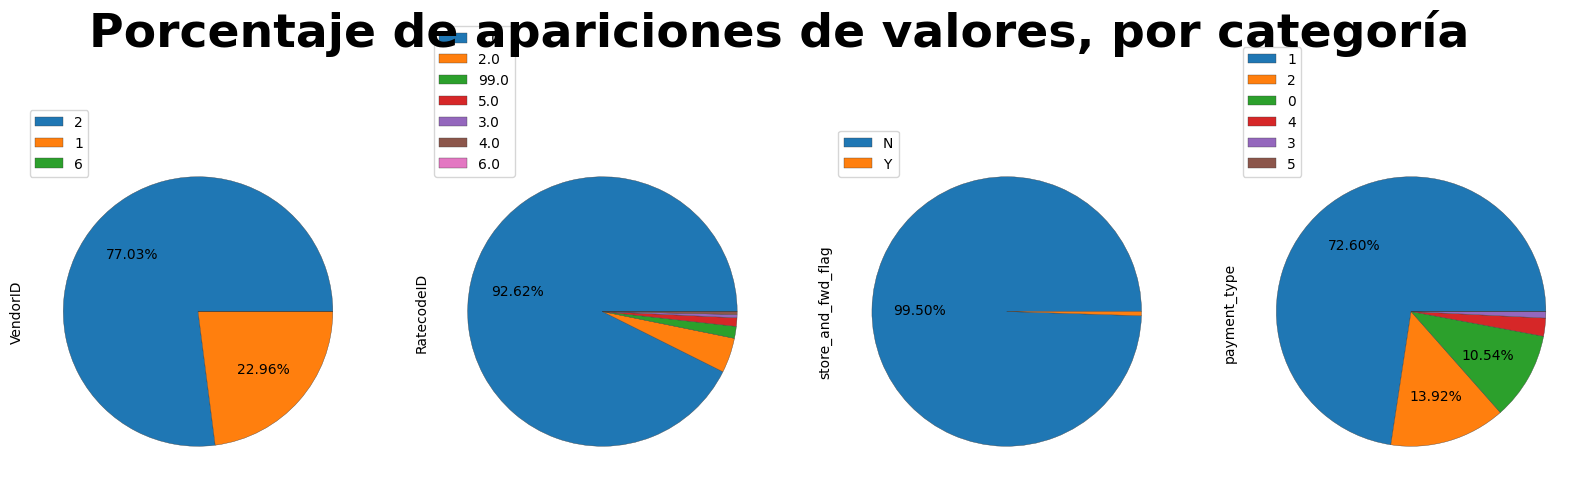

In [ ]:
import matplotlib.pyplot as plt

variables_categoricas = ["VendorID", "RatecodeID", "store_and_fwd_flag", "payment_type"]
limite_valores = 10
limite_porcentaje = 10.0

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5)) # Adjusted for 4 plots
fig.suptitle("Porcentaje de apariciones de valores, por categoría", y=1.1, fontsize=34, weight="bold")

for i, categoria in enumerate(variables_categoricas):
    cuenta = dataset[categoria].value_counts().to_frame()
    if len(cuenta) > limite_valores:
        cuenta = cuenta.head(limite_valores)

    ax = cuenta.plot.pie(subplots=True, ylabel=categoria,
                         autopct=(lambda pct: "%1.2f%%" % pct if pct >= limite_porcentaje else ""), # No mostrar porcentajes menores a 10%
                         pctdistance=0.65,
                         wedgeprops={"edgecolor": "#3c3c3c", "linewidth": 0.25},
                         legend=True, labeldistance=None,
                         ax=axes[i]) # Corrected indexing for axes
    # 'ax' is, in fact, an array of a single element: the 'Axes'. This is due to subplots=True
    ax[0].legend(loc=(0, 0.9))

## Correlaciones

Comprobamos a continuación la correlación entre las variables:

Text(0.5, 1.05, 'Correlaciones entre cada par de variables')

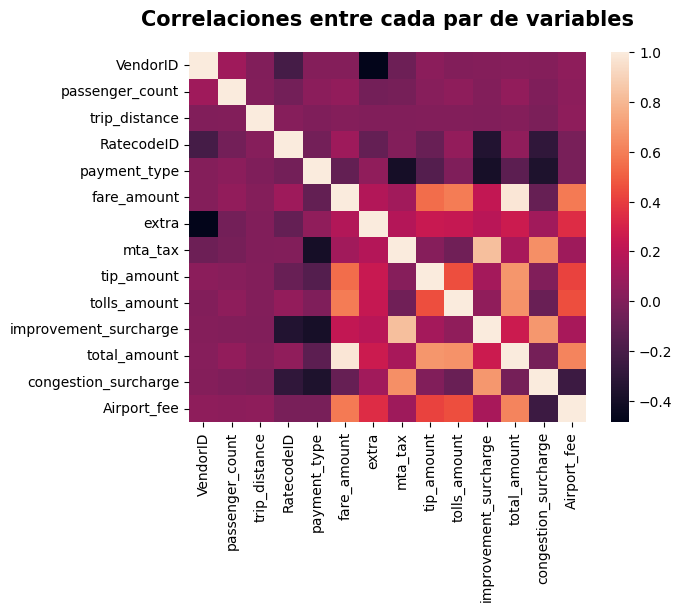

In [ ]:
correlaciones = dataset.corr(numeric_only=True)
sns.heatmap(correlaciones)
plt.title("Correlaciones entre cada par de variables",
          y=1.05,
          fontdict={"size": 15, "weight": "bold"})

Correlaciones sobresalientes:
1. `improvement_surcharge` y `mta_tax`
2. `total_amount` y `fare_amount`
3. `total_amount` y `tip_amount`
4. `total_amount` y `tolls_amount`
5. `total_amount` y `airport_fee`

Se observa que las correlaciones más altas se concentran en variables relacionadas con el cálculo de la tarifa del viaje. En particular, la variable `total_amount`, al ser la suma de todos los componentes del costo (como `fare_amount`, `tip_amount`, `tolls_amount` y `airport_fee`), presenta una fuerte correlación con cada una de estas. Esto confirma que su comportamiento está directamente explicado por dichas variables.

Otro caso destacable es la fuerte relación entre `improvement_surcharge` y `mta_tax`, lo cual puede deberse a que ambos son cargos aidcionales por la bajada de bandera del taxi.

# Datos Faltantes

Primero, comprobamos de que no hay filas repetidas:

In [ ]:
duplicados = dataset.duplicated(keep=False).sum()
print(f"Número de filas duplicadas: {duplicados}")
dataset.drop_duplicates(inplace=True)

Número de filas duplicadas: 2


## Analisis valores nulos

In [ ]:
print(dataset.isna().sum())

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          1021387
trip_distance                  0
RatecodeID               1021387
store_and_fwd_flag       1021387
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     1021387
Airport_fee              1021387
PUBorough                   6547
PUZone                     27308
DOBorough                  53442
DOZone                     38500
dtype: int64


`passenger_count`, `RatecodeID`, `store_and_fwd_flag`, `congestion_surcharge`, `Airport_fee` y las variables relacionadas con las zonas de NYC presentan al menos un valor nulo.

Cantidad de valores nulos por variable:

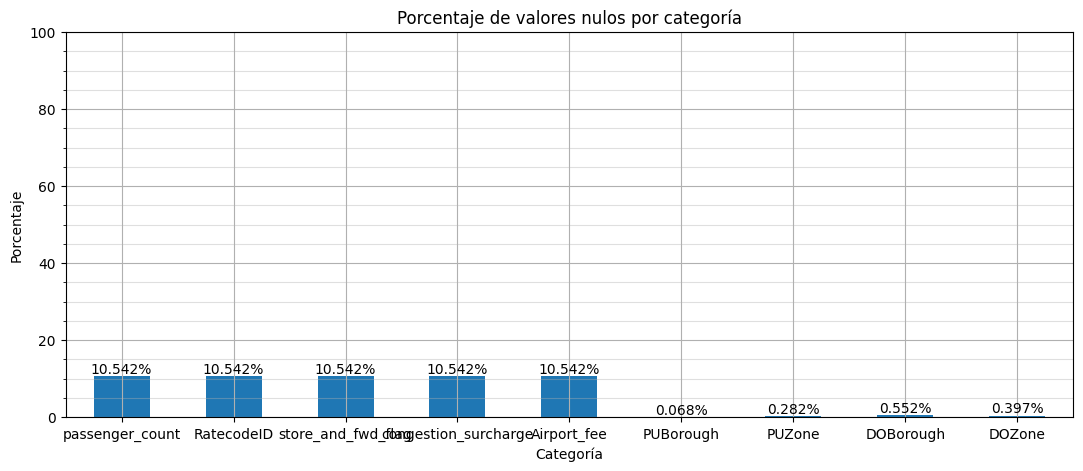

In [ ]:
dataset_nulos = dataset[["passenger_count", "RatecodeID", "store_and_fwd_flag", "congestion_surcharge", "Airport_fee", "PUBorough", "PUZone", "DOBorough", "DOZone"]].copy()

serie_col_con_nulos = dataset_nulos.isna().sum() / len(dataset.index) * 100

ax = serie_col_con_nulos.plot.bar(title="Porcentaje de valores nulos por categoría",
                                  xlabel="Categoría", ylabel="Porcentaje", rot=0.0,
                                  yticks=np.arange(0, 101, 20), figsize=(13,5))
ax.set_yticks(np.arange(0, 101, 5), minor=True)
ax.grid(which="major", alpha=1.0)
ax.grid(which="minor", alpha=0.4)
for cont in ax.containers:
    ax.bar_label(container=cont, fmt="%1.3f%%")

1. `passenger_count` tiene una cantidad considerable de valores nulos, pero podemos inferir un valor usando el resto de los valores disponibles. En este caso decidimos utilizar la media, ya que es una variable cuantitativa discreta.
2. `RatecodeID` tiene valores nulos que en realidad deberían ser un 99.
3. `store_and_fwd_flag` tiene una cantidad considerable de valores nulos, pero podemos inferir un valor usando el resto de los valores disponibles. En este caso dado que un 99.5% de los datos tiene un N, podemos inferir ese valor para los faltantes.
4. `congestion_surcharge` tiene una cantidad considerable de valores nulos, pero podemos inferir un valor usando el resto de los valores disponibles. En este caso decidimos utilizar el promedio para los valores faltantes.
5. `Airport_fee` tiene una cantidad considerable de valores nulos, pero podemos inferir un valor usando el resto de los valores disponibles. En este caso si la zona de comienzo del viaje es LaGuardia Airport o JFK Airport, entonces se cobra una tarifa de 1.75, sino cero.
6. `PUBorough`, `PUZone`, `DOBorough`, `DOZone` el dataset de zonas categoriza como valor nulo a zonas o barrios fuera de NYC o desconocidas.

### Rellenado `passenger_count`


In [ ]:
print("Cantidad nulos en la columna passenger_count: ", dataset["passenger_count"].isna().sum())
print("Media: ", dataset["passenger_count"].median())
print("Promedio: ", dataset["passenger_count"].mean())
print("--------------------------------------------")
dataset["passenger_count"] = dataset["passenger_count"].fillna(dataset["passenger_count"].median())
print("Luego de rellenar los valores nulos:")
print("Cantidad nulos en la columna passenger_count: ", dataset["passenger_count"].isna().sum())
print("Media: ", dataset["passenger_count"].median())
print("Promedio: ", dataset["passenger_count"].mean())

Cantidad nulos en la columna passenger_count:  1021387
Media:  1.0
Promedio:  1.337451290580415
--------------------------------------------
Luego de rellenar los valores nulos:
Cantidad nulos en la columna passenger_count:  0
Media:  1.0
Promedio:  1.3018785513434405


### Rellenado `RatecodeID`

In [ ]:
print("Cantidad nulos en la columna RatecodeID: ", dataset["RatecodeID"].isna().sum())
print("--------------------------------------------")
dataset["RatecodeID"] = dataset["RatecodeID"].fillna(99)
print("Luego de rellenar los valores nulos:")
print("Cantidad nulos en la columna RatecodeID: ", dataset["RatecodeID"].isna().sum())

Cantidad nulos en la columna RatecodeID:  1021387
--------------------------------------------
Luego de rellenar los valores nulos:
Cantidad nulos en la columna RatecodeID:  0


### Rellenado `store_and_fwd_flag`

In [ ]:
print("Cantidad nulos en la columna store_and_fwd_flag: ", dataset["store_and_fwd_flag"].isna().sum())
print("--------------------------------------------")
dataset["store_and_fwd_flag"] = dataset["store_and_fwd_flag"].fillna("N")
print("Luego de rellenar los valores nulos:")
print("Cantidad nulos en la columna store_and_fwd_flag: ", dataset["store_and_fwd_flag"].isna().sum())

Cantidad nulos en la columna store_and_fwd_flag:  1021387
--------------------------------------------
Luego de rellenar los valores nulos:
Cantidad nulos en la columna store_and_fwd_flag:  0


### Rellenado `congestion_surcharge`

In [ ]:
print("Cantidad nulos en la columna congestion_surcharge: ", dataset["congestion_surcharge"].isna().sum())
print("Media: ", dataset["congestion_surcharge"].median())
print("Promedio: ", dataset["congestion_surcharge"].mean())
print("--------------------------------------------")
dataset["congestion_surcharge"] = dataset["congestion_surcharge"].fillna(dataset["congestion_surcharge"].mean())
print("Luego de rellenar los valores nulos:")
print("Media: ", dataset["congestion_surcharge"].median())
print("Promedio: ", dataset["congestion_surcharge"].mean())
print("Cantidad nulos en la columna congestion_surcharge: ", dataset["congestion_surcharge"].isna().sum())

Cantidad nulos en la columna congestion_surcharge:  1021387
Media:  2.5
Promedio:  2.197805670644026
--------------------------------------------
Luego de rellenar los valores nulos:
Media:  2.5
Promedio:  2.197805670644022
Cantidad nulos en la columna congestion_surcharge:  0


### Rellenado `Airport_fee`

In [ ]:
print("Cantidad nulos en la columna Airport_fee: ", dataset["Airport_fee"].isna().sum())
print("--------------------------------------------")
dataset["Airport_fee"] = dataset["Airport_fee"].fillna(
    dataset["PUZone"].apply(lambda x: 1.75 if x in ["LaGuardia Airport", "JFK Airport"] else 0))
print("Luego de rellenar valores nulos:")
print("Cantidad nulos en la columna Airport_fee: ", dataset["Airport_fee"].isna().sum())

Cantidad nulos en la columna Airport_fee:  1021387
--------------------------------------------
Luego de rellenar valores nulos:
Cantidad nulos en la columna Airport_fee:  0


## Rellenado variables zonas

In [ ]:
print("Cantidad nulos en la columna PUBorough: ", dataset['PUBorough'].isna().sum())
print("Cantidad nulos en la columna PUZone: ", dataset['PUZone'].isna().sum())
print("Cantidad nulos en la columna DOBorough: ", dataset['DOBorough'].isna().sum())
print("Cantidad nulos en la columna DOZone: ", dataset['DOZone'].isna().sum())

# Si PUBorough es "Unknown", entonces PUZone nulo -> "Unknown"
dataset.loc[(dataset["PUBorough"] == "Unknown") & (dataset["PUZone"].isna()), "PUZone"] = "Unknown"

# Si DOBorough es "Unknown", entonces DOZone nulo -> "Unknown"
dataset.loc[(dataset["DOBorough"] == "Unknown") & (dataset["DOZone"].isna()), "DOZone"] = "Unknown"

# Si PUZone es "Outside of NYC", entonces PUBorough nulo -> "Outside of NYC"
dataset.loc[(dataset["PUZone"] == "Outside of NYC") & (dataset["PUBorough"].isna()), "PUBorough"] = "Outside of NYC"

# Si DOZone es "Outside of NYC", entonces DOBorough nulo -> "Outside of NYC"
dataset.loc[(dataset["DOZone"] == "Outside of NYC") & (dataset["DOBorough"].isna()), "DOBorough"] = "Outside of NYC"

print("-----------------------------")
print("Luego de rellenar valores: ")
print("Cantidad nulos en la columna PUBorough: ", dataset['PUBorough'].isna().sum())
print("Cantidad nulos en la columna PUZone: ", dataset['PUZone'].isna().sum())
print("Cantidad nulos en la columna DOBorough: ", dataset['DOBorough'].isna().sum())
print("Cantidad nulos en la columna DOZone: ", dataset['DOZone'].isna().sum())

Cantidad nulos en la columna PUBorough:  6547
Cantidad nulos en la columna PUZone:  27308
Cantidad nulos en la columna DOBorough:  53442
Cantidad nulos en la columna DOZone:  38500
-----------------------------
Luego de rellenar valores: 
Cantidad nulos en la columna PUBorough:  0
Cantidad nulos en la columna PUZone:  0
Cantidad nulos en la columna DOBorough:  0
Cantidad nulos en la columna DOZone:  0


## Post-procesamiento de valores faltantes

Luego de procesar para cada caso como completar los valores faltantes, no quedan en el dataset valores nulos

In [ ]:
print(dataset.isna().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
PUBorough                0
PUZone                   0
DOBorough                0
DOZone                   0
dtype: int64


# Identificación y análisis de valores atípicos.

##Creacion variable duracion de viaje en minutos

In [ ]:
dataset["trip_duration_min"] = (pd.to_datetime(dataset["tpep_dropoff_datetime"]) -
                                    pd.to_datetime(dataset["tpep_pickup_datetime"])).dt.total_seconds() / 60

Para identificar valores outliers posibles, se graficaron algunas de las variables a analizar en graficos de boxplot. Estos permiten graficar la distribucion de una variable numerica, siendo los registros dentro de la caja la representacion del 50% central de los datos.

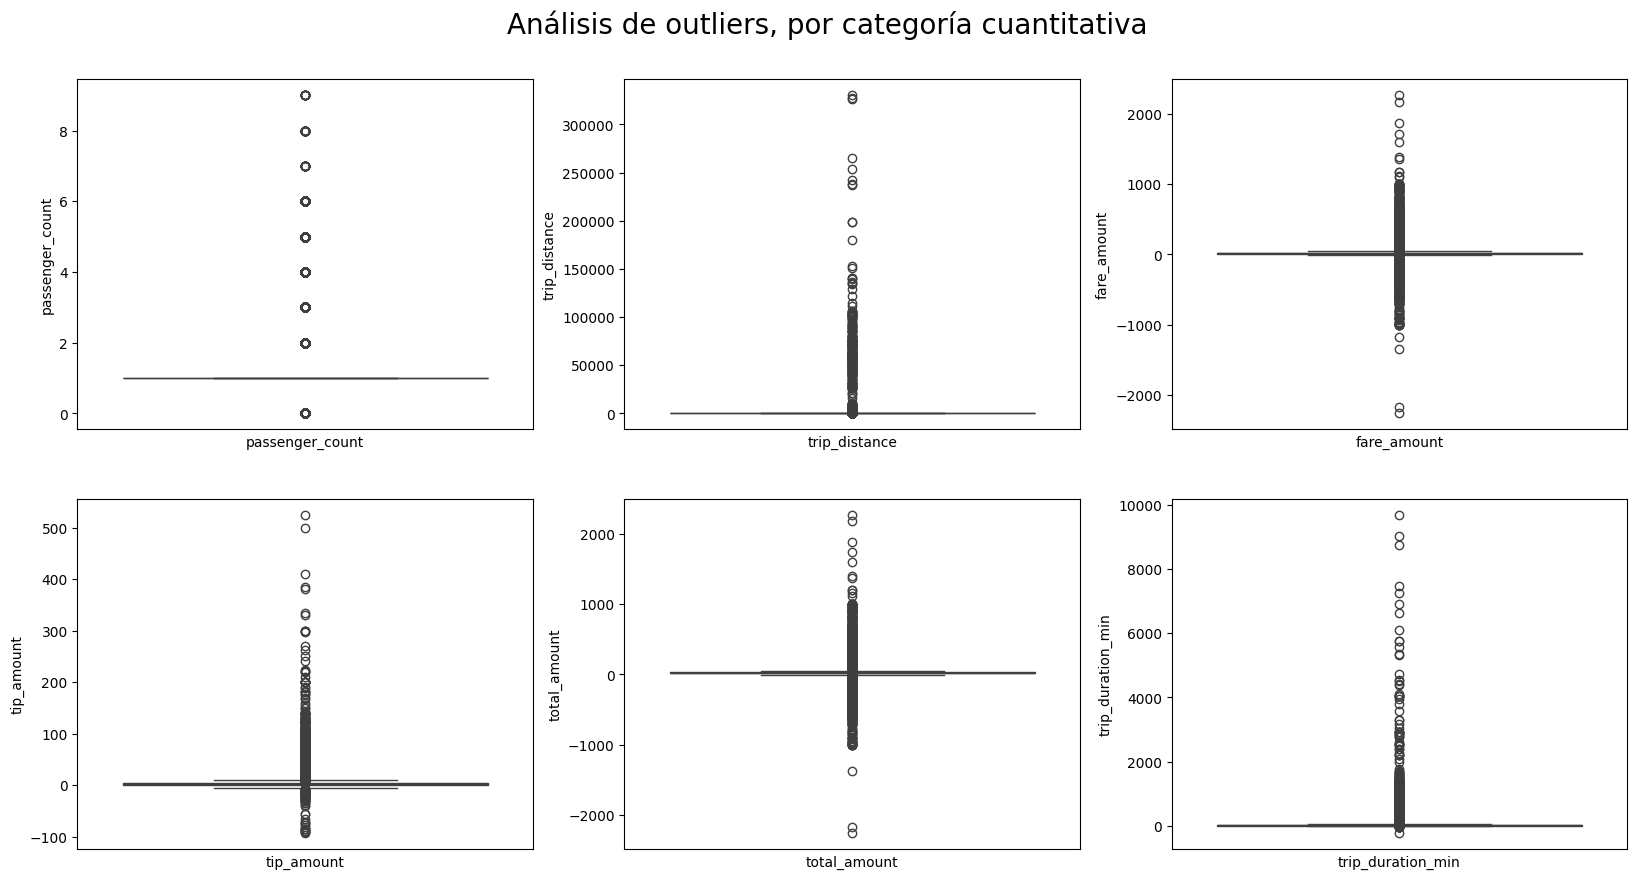

In [ ]:

variables_cuantitativas = ["passenger_count", "trip_distance", "fare_amount", "tip_amount", "total_amount", "trip_duration_min"]
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set(figheight=10, figwidth=20) # en pulgadas
fig.suptitle("Análisis de outliers, por categoría cuantitativa", y=0.95, fontsize=20)

for i, cat in enumerate(variables_cuantitativas):
    ax = sns.boxplot(data=dataset[cat], ax=axes.flat[i])
    ax.set(xlabel=cat, xticks=[])

plt.subplots_adjust(wspace=0.2, hspace=0.2)

Se realizo un analisis sobre cada variable, decidiendo que valores son outliers.
Por ejemplo

*   Registros con `passenger_count` == 0
*   Registros con `trip_duration_min` > 360 (6hs)
*   Regsitros con `total_amount` > 1000
*   etc

Para estos casos, se realizo un analisis univariado:


## Outliers Univariados

### Outlier `passenger_count`

Para resolver el problema de outliers en la variable `passenger_count`:

In [ ]:
#un viaje no puede tener cero pasajeros
cant_viajes_cero_pasajeros = (dataset["passenger_count"] == 0).sum()
print("Cantidad de viajes con cero pasajeros: ", cant_viajes_cero_pasajeros)

Cantidad de viajes con cero pasajeros:  85708


No pueden existir viajes de taxi sin pasajeros, la mejor solución seria asignarle el valor de la media, como se hizo en el caso de los datos faltantes

In [ ]:
median = dataset["passenger_count"].median()
dataset.replace({"passenger_count": {0: median}}, inplace=True)

Aunque un taxi no deberia llevar mas de 4 pasajeros de media, el tener el registro de un viaje con mas pasajeros que los asientos disponibles es posible, aunque no recomendable por la seguridad de viaje. Asi que esos registros podrian tomarse como válidos.

### Outliers `total_amount`

Para resolver el porblema de outliers en la variables de `total_amount`: primero se observo la cantidad de casos de valores negativos cargados en los viajes, para estos se opto por cambiar el signo de estos valores cargados para que sean valores "correctos".


In [ ]:
#buscamos los valores negativos cargados en el data set en las sigueintes columnas
columnas_tarifas = ["fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "total_amount", "congestion_surcharge", "Airport_fee"]

dataset[columnas_tarifas] = dataset[columnas_tarifas].abs()

Además se puede analizar en el gráfico de boxplot como la mayoria de viajes se conecntran entre precios de mayores a cero y menores a mil. Por lo que puede tomarse como un valor outlier con un total_amount excesivo am los viajes con tarifa mayor a mil.

In [ ]:
cant_outliers = (dataset["total_amount"] > 1000).sum()
print(f"Viajes con tarifa > 1000: {cant_outliers}")

print("-----------------------------")

# identificar índices de las filas que cumplen la condición de outlier
indices_outliers = dataset[dataset["total_amount"] > 1000].index
dataset.drop(indices_outliers, inplace=True)

print("Luego de eliminar registros:")
cant_outliers = (dataset["total_amount"] > 1000).sum()
print(f"Viajes con tarifa > 1000: {cant_outliers}")


Viajes con tarifa > 1000: 15
-----------------------------
Luego de eliminar registros:
Viajes con tarifa > 1000: 0


### Outliers `trip_duration_min`

Para resolver el problema de outliers para la variable de duracion del viaje, se debian identificar que casos de duarcion de viajes son extremos o invalidos. Por ejemplo viajes con duración negativa son cosniderados viajes inválidos, o viajes con duracion de mas de 6 horas tienen una duracion extrema.

In [ ]:
cant_outliers = (dataset["trip_duration_min"] > 360).sum()
print(f"Viajes con duración > 6h: {cant_outliers}")

cant_outliers = (dataset["trip_duration_min"] <= 0).sum()
print(f"Viajes con duración < 0hs: {cant_outliers}")

Viajes con duración > 6h: 5155
Viajes con duración < 0hs: 3247


Al comprobar que la cantidad de registros con una duracion extrema o negativa es pequeña en comparación al total de regsitros, se optó por la eliminacion de estos viajes por se inválidos.

In [ ]:
# identificar índices de las filas que cumplen la condición de outlier
indices_outliers = dataset[(dataset["trip_duration_min"] >= 360) | (dataset["trip_duration_min"] <= 0)].index
dataset.drop(indices_outliers, inplace=True)

print("Luego de eliminar registros:")
cant_outliers = (dataset["trip_duration_min"] > 360).sum()
print(f"Viajes con duración > 6h: {cant_outliers}")

cant_outliers = (dataset["trip_duration_min"] <= 0).sum()
print(f"Viajes con duración < 0hs: {cant_outliers}")

Luego de eliminar registros:
Viajes con duración > 6h: 0
Viajes con duración < 0hs: 0


### Outliers `trip_distance`

Para el caso de outliers para la distancia recorrida por los viajes. Al ser viajes cerca de la ciudad de Nueva York, la distancia recorrida por el viaje no debe ser extrema.
En el dataset la unidad de medida de la distancia de los viajes esta en millas y se pueden encontrar casos de distancia demasiado largas para un viaje en taxi.

In [ ]:
millas = 150
viajes_mayor_150_millas = dataset[dataset["trip_distance"] > millas].shape[0]
viajes_menor_150_millas = dataset[dataset["trip_distance"] <= millas].shape[0]
viajes_negativos = dataset[dataset["trip_distance"] < 0].shape[0]
viajes_0_millas = dataset[dataset["trip_distance"] == 0].shape[0]

print("viajes mayor a 150 millas: ", viajes_mayor_150_millas)
print("viajes menor a 150 millas:", viajes_menor_150_millas)
print("viajes distancia negativa: ", viajes_negativos)
print("viajes con 0 millas", viajes_0_millas)

viajes mayor a 150 millas:  313
viajes menor a 150 millas: 9680385
viajes distancia negativa:  0
viajes con 0 millas 183427


Los viajes que tienen cargado una distancia de viaje de 0 millas, son viajes cargados invalidamente que habria que eliminar.
Luego con los viajes con una distancia enorme en millas, tambien se podria decidir elimnarlos ya que al ser un valor muy grande para un viaje en taxi, el datos se toma como invalido y puede inducir a resultados erroneos en analisis posteriores.

In [ ]:
distancia_extrema = 150
#distancia extrema
cant_outliers = (dataset["trip_distance"] > distancia_extrema).sum()
print(f"Viajes con distancia mayor a {distancia_extrema} millas : {cant_outliers}")

#distancia nula o negativa
cant_outliers = (dataset["trip_distance"] <= 0).sum()
print(f"Viajes con distancia nula o negativa: {cant_outliers}")

indices_outliers = dataset[(dataset["trip_distance"] >= distancia_extrema) | (dataset["trip_distance"] <= 0)].index
dataset.drop(indices_outliers, inplace=True)
print("-----------------------------")
print("Luego de eliminar registros:")

#distancia extrema
cant_outliers = (dataset["trip_distance"] > distancia_extrema).sum()
print(f"Viajes con distancia mayor a {distancia_extrema} millas : {cant_outliers}")

#distancia nula o negativa
cant_outliers = (dataset["trip_distance"] <= 0).sum()
print(f"Viajes con distancia nula o negativa: {cant_outliers}")

Viajes con distancia mayor a 150 millas : 313
Viajes con distancia nula o negativa: 183427
-----------------------------
Luego de eliminar registros:
Viajes con distancia mayor a 150 millas : 0
Viajes con distancia nula o negativa: 0


## Cargar dataset procesado hasta este punto

In [ ]:
url = 'https://drive.google.com/file/d/1WKTxrjZNmfFqhD79KUbScs_kFGlv0Dg_/view?usp=drive_link'
output_path = 'dataset_taxi_hasta_atipicos_univaraidos.parquet'
gdown.download(url, output_path, quiet=False,fuzzy=True)

dataset = pq.read_table("dataset_taxi_hasta_atipicos_univaraidos.parquet")
dataset = dataset.to_pandas()

Downloading...
From (original): https://drive.google.com/uc?id=1WKTxrjZNmfFqhD79KUbScs_kFGlv0Dg_
From (redirected): https://drive.google.com/uc?id=1WKTxrjZNmfFqhD79KUbScs_kFGlv0Dg_&confirm=t&uuid=d0359ada-1e86-48db-b1db-be62bec30ebd
To: /content/dataset_taxi_hasta_atipicos_univaraidos.parquet
100%|██████████| 255M/255M [00:02<00:00, 121MB/s]


## Outlier Multivariados

Para casos mas complejos, o que se necesite de un estudio de las correlaciones entre variables. Se utilizo para la deteccionde outliers el algoritmo de Isolation forest.

In [ ]:
from sklearn.ensemble import IsolationForest

# Copiamos dataset para no modificar el original
df_outliers = dataset.copy()

df_outliers["tip_percentage"] = np.where(df_outliers["fare_amount"] > 0,
                                         df_outliers["tip_amount"] / df_outliers["fare_amount"] * 100,
                                         0)

# Seleccionamos features relevantes para detección de outliers
features = ["passenger_count", "trip_distance", "fare_amount", "tip_amount", "total_amount", "trip_duration_min"]

# --- Outliers multidimensionales con Isolation Forest ---
iforest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df_outliers["outlier_label"] = iforest.fit_predict(df_outliers[features].fillna(0))

print(df_outliers["outlier_label"].value_counts())

# Visualizamos algunos viajes anómalos detectados
outliers_detectados = df_outliers[df_outliers["outlier_label"] == -1]
print("Cantidad de outliers detectados ", df_outliers[df_outliers['outlier_label'] == -1].shape[0])

outlier_label
 1    9402000
-1      94958
Name: count, dtype: int64
Cantidad de outliers detectados  94958


Para identificar viajes atípicos en múltiples dimensiones, se aplicó el algoritmo Isolation Forest.
Este clasifica en outlier segun con que facilidad ese viaje puede separarse de las demas observaciones.

Luego para cada una de las variables estudiadas para los outliers, se realizó un gráfico de densidad distribución entre registros dentro de los parametros "normales" y los outliers marcados por el algoritmo.

### Graficos de distribucion de registros outliers por variable

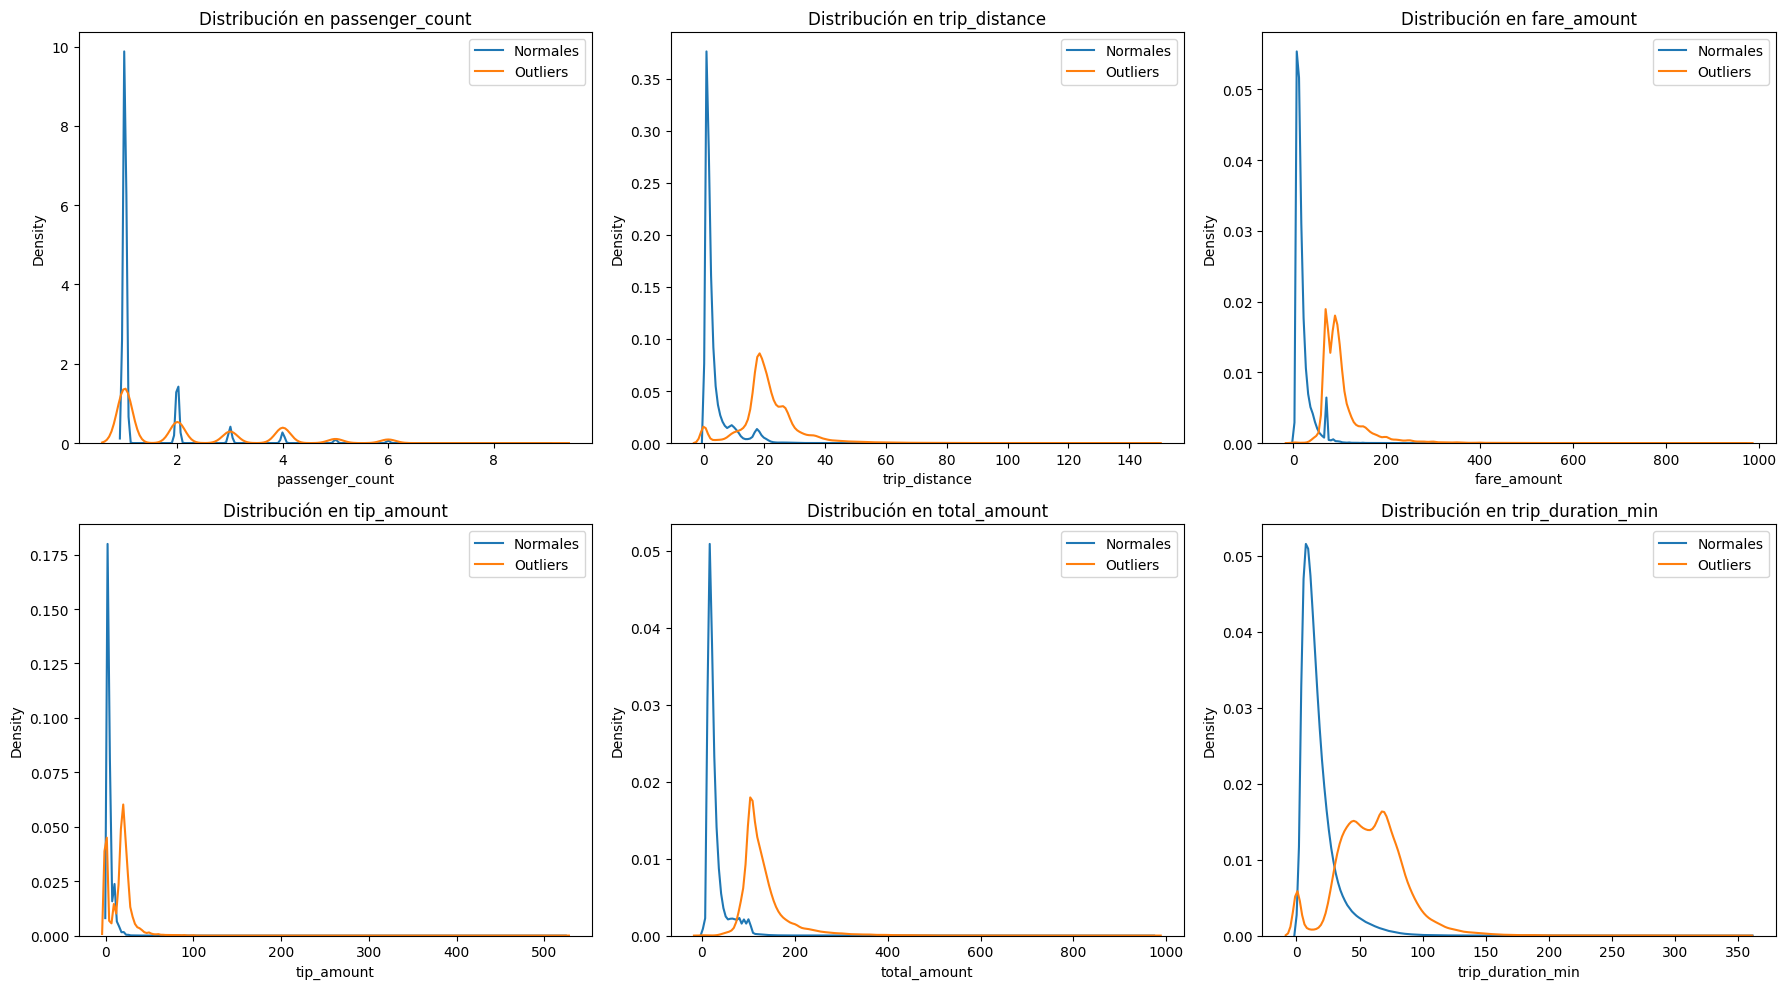

In [ ]:
features = ["passenger_count", "trip_distance", "fare_amount", "tip_amount", "total_amount", "trip_duration_min"]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()  # para recorrerlos fácilmente en un solo loop

for i, col in enumerate(features):
    sns.kdeplot(df_outliers[col], label="Normales", ax=axes[i])
    sns.kdeplot(outliers_detectados[col], label="Outliers", ax=axes[i])
    axes[i].set_title(f"Distribución en {col}")
    axes[i].legend()

plt.tight_layout()
plt.show()

### Graficos de relacion de variables

Tambien se realizaron graficos para estudiar la distribucion de los registros. De esta forma poder visualizar en una relacion entre dos variables, como se distribuyen los registros encontrados como outliers por el algoritmo.

#### Outliers relacion duracion y tarfia total del viaje

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


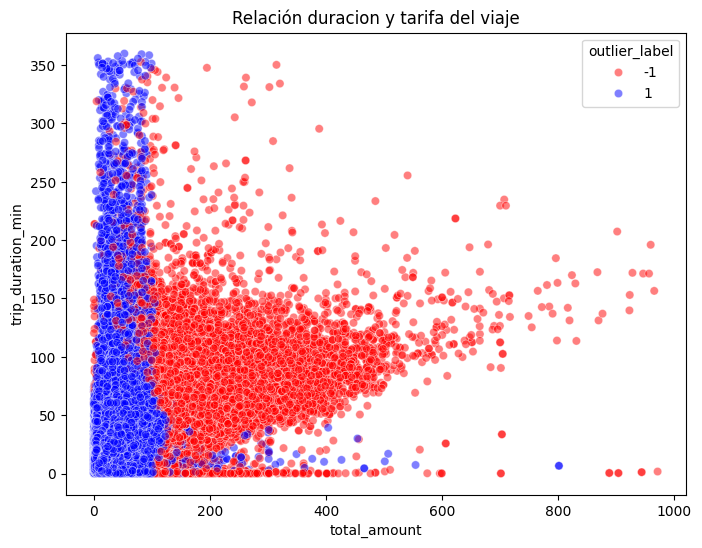

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_outliers,  x="total_amount", y="trip_duration_min",
                hue="outlier_label", alpha=0.5,
                palette={1:"blue",-1:"red"})
plt.title("Relación duracion y tarifa del viaje")
plt.show()

#### Outliers relacion duracion y distancia del viaje

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


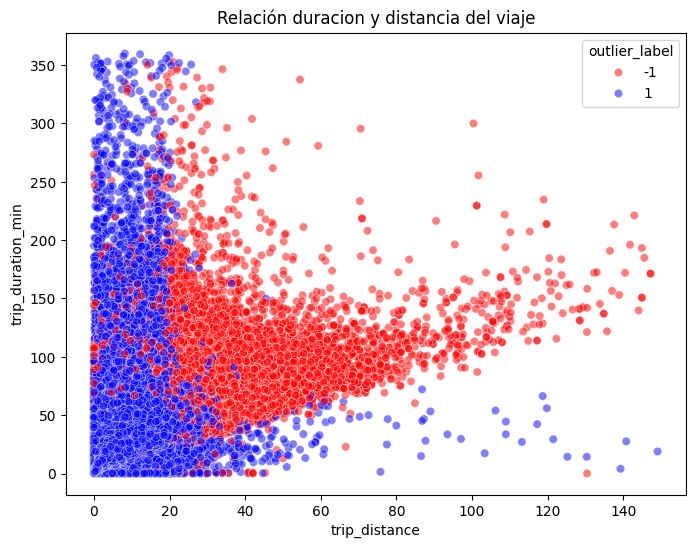

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_outliers,  x="trip_distance", y="trip_duration_min",
                hue="outlier_label", alpha=0.5,
                palette={1:"blue",-1:"red"})
plt.title("Relación duracion y distancia del viaje")
plt.show()

#### Outliers relacion cantidad de pasajeros y propina del viaje

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


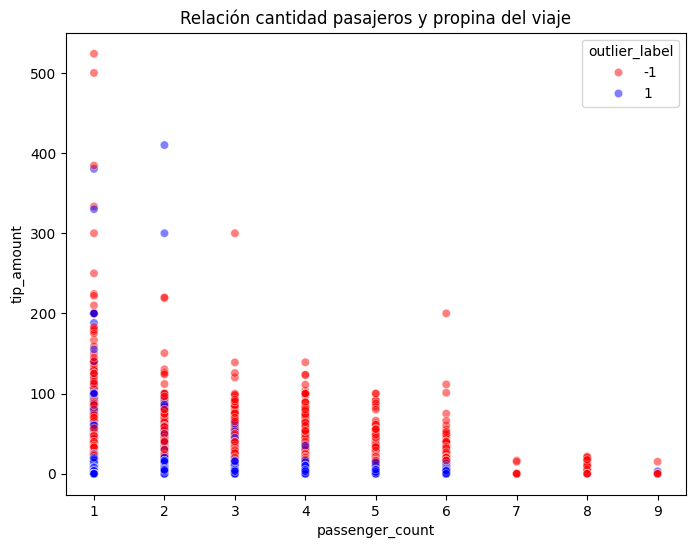

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_outliers,  x="passenger_count", y="tip_amount",
                hue="outlier_label", alpha=0.5,
                palette={1:"blue",-1:"red"})
plt.title("Relación cantidad pasajeros y propina del viaje")
plt.show()

#### Outliers relacion tarifa parcial y propina del viaje

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


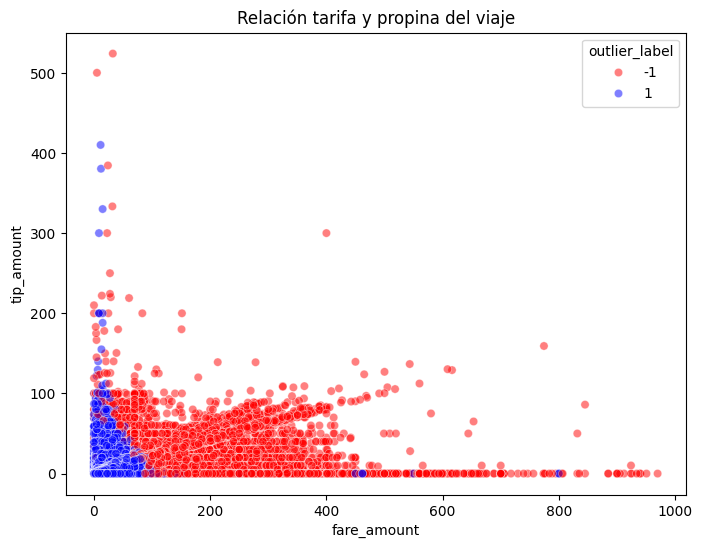

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_outliers,  x="fare_amount", y="tip_amount",
                hue="outlier_label", alpha=0.5,
                palette={1:"blue",-1:"red"})
plt.title("Relación tarifa y propina del viaje")
plt.show()

#### Outliers relacion tarfia total y porpina del viaje

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


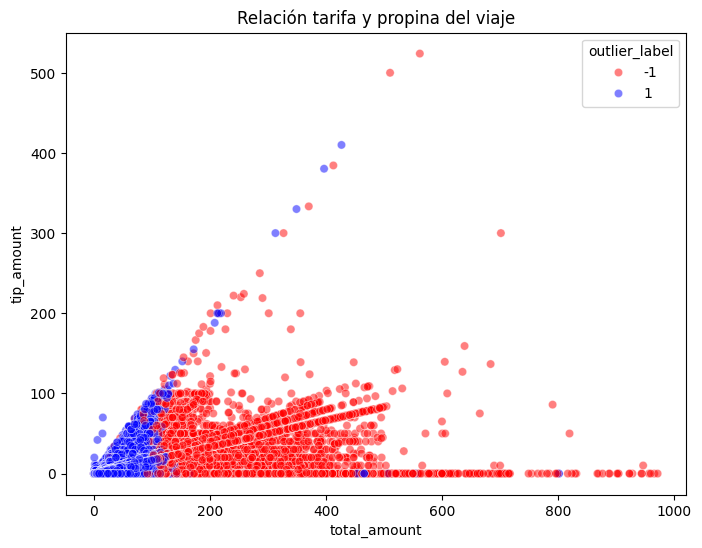

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df_outliers,  x="total_amount", y="tip_amount",
                hue="outlier_label", alpha=0.5,
                palette={1:"blue",-1:"red"})
plt.title("Relación tarifa y propina del viaje")
plt.show()

### Conclusiones acerca del estudio multivariado

Dado que la cantidad de outliers es pequeña en comparación con el total de registros del dataset, y considerando que los gráficos muestran que estos registros tienden a estar más dispersos mientras que los datos "normales" se concentran con mayor densidad en determinadas zonas, se decidió eliminarlos. Los outliers representaban aproximadamente el 1 % del total de registros.

In [ ]:
df_outliers.drop(df_outliers[df_outliers["outlier_label"] == -1].index, inplace=True)
print("Cantidad de registros luego de eliminar outliers: ", df_outliers.shape[0])

Cantidad de registros luego de eliminar outliers:  9402000


# Preguntas de Investigación

## Pueden existir horarios donde el trafico afecta significativamente la duracion del viaje?

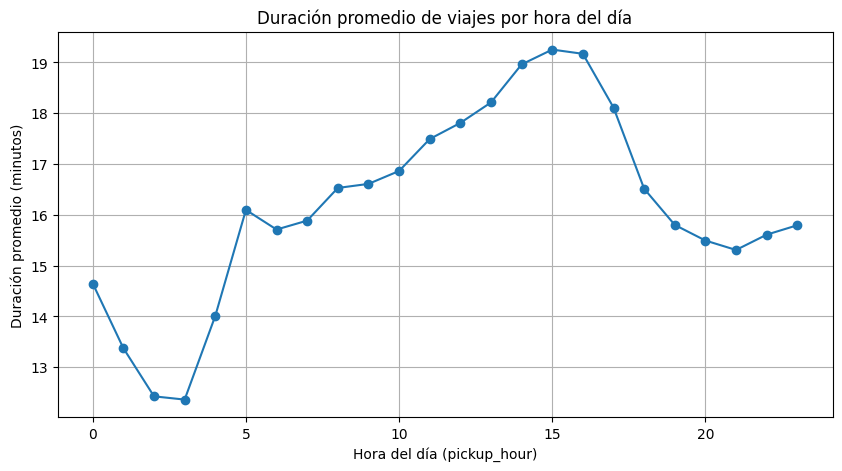

In [ ]:
df_preguntas = df_outliers.copy()

df_preguntas["pickup_hour"] = df_preguntas["tpep_pickup_datetime"].dt.hour

promedio_por_hora = df_preguntas.groupby("pickup_hour")["trip_duration_min"].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(promedio_por_hora["pickup_hour"], promedio_por_hora["trip_duration_min"], marker="o")
plt.title("Duración promedio de viajes por hora del día")
plt.xlabel("Hora del día (pickup_hour)")
plt.ylabel("Duración promedio (minutos)")
plt.grid(True)
plt.show()


Se puede observar como la hora con mayor duración promedio de viajes es entre las 14-16pm, esto puede deberse a un aumento del tráfico en la ciudad. Mientras que la menor duracion de viajes es entre las 12-5am, de seguro debido al poco transito en las horas de la madrugada.

## ¿Cambia la cantidad de pasajeros segun la hora del día?

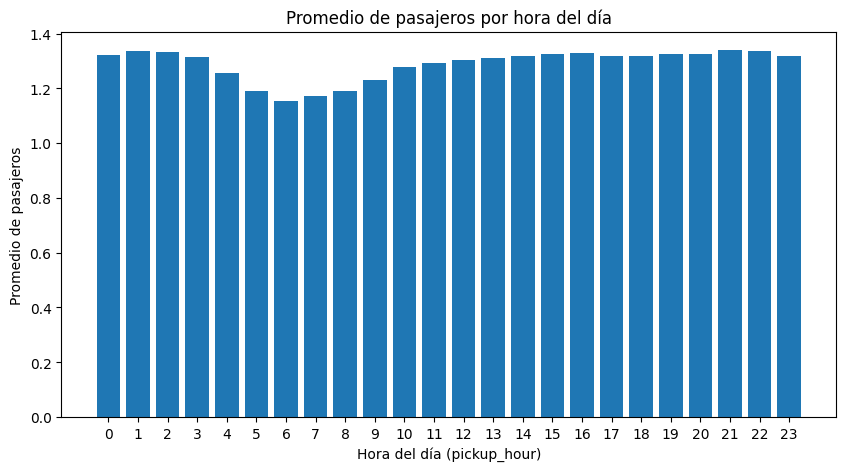

In [ ]:
df_preguntas["passenger_count"] = dataset["passenger_count"]

avg_passengers_by_hour = df_preguntas.groupby("pickup_hour")["passenger_count"].mean().reset_index()

plt.figure(figsize=(10,5))
plt.bar(avg_passengers_by_hour["pickup_hour"], avg_passengers_by_hour["passenger_count"])
plt.title("Promedio de pasajeros por hora del día")
plt.xlabel("Hora del día (pickup_hour)")
plt.ylabel("Promedio de pasajeros")
plt.xticks(range(24))
plt.show()

No se puede observar una gran diferencia en la cantidad de pasajeros por hora del dia. Se ve claramente como a toda hora del dia la cantidad de pasajeros promedio se mantiene ~1.

## ¿Existe una relacion entre la tarifa de bajada de bandera y la zona del comienzo del viaje?

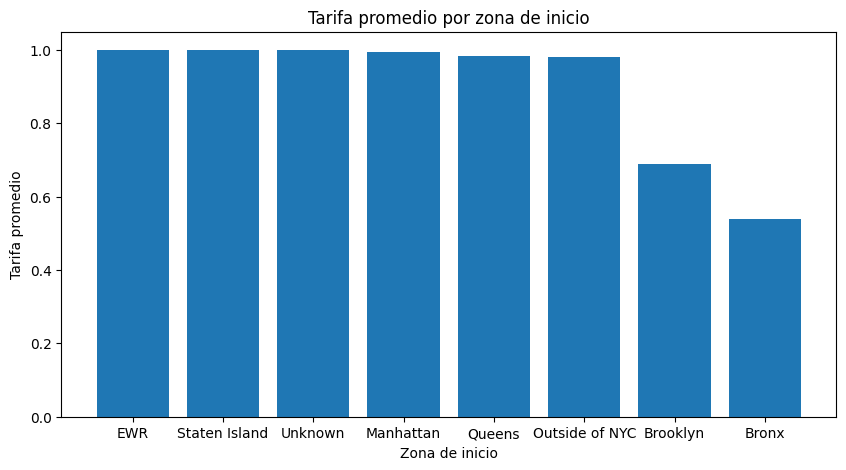

In [ ]:
tarifa_por_locationID = df_preguntas.groupby("PUBorough")["improvement_surcharge"].agg(["mean"]).reset_index()
tarifa_por_locationID = tarifa_por_locationID.sort_values(by="mean", ascending=False)

plt.figure(figsize=(10,5))
plt.bar(tarifa_por_locationID["PUBorough"], tarifa_por_locationID["mean"])
plt.title("Tarifa promedio por zona de inicio")
plt.xlabel("Zona de inicio")
plt.ylabel("Tarifa promedio")
plt.show()

Se puede observar como el precio de baja de bandera se mantiene igual para la mayor cantidad de Boroughs de NYC, mientras que Brooklyn y el Bronx presentan el menor valor de bajada de bandera promedio.

## ¿Cambia el precio de un viaje dependiendo si es un dia de semana o fin de semana?¿Hay mas viajes los fines de semana?

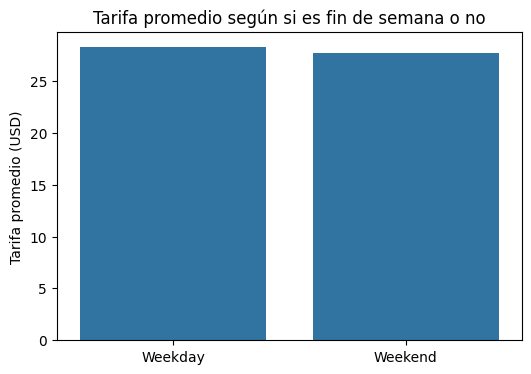

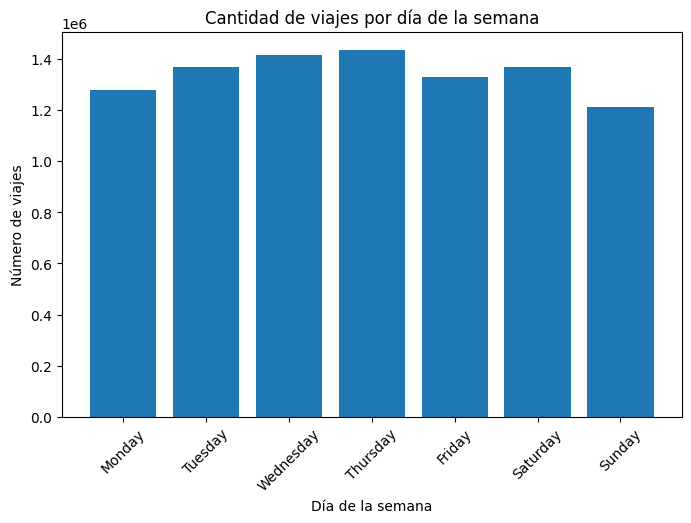

In [ ]:
df_preguntas["tpep_pickup_datetime"] = pd.to_datetime(df_preguntas["tpep_pickup_datetime"])
df_preguntas["day_of_week"] = df_preguntas["tpep_pickup_datetime"].dt.dayofweek

df_preguntas["is_weekend"] = df_preguntas["day_of_week"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

tarifa_segun_finde = df_preguntas.groupby("is_weekend")["total_amount"].agg(["mean"]).reset_index()

df_preguntas["day_name"] = df_preguntas["tpep_pickup_datetime"].dt.day_name()


viajes_por_dia_semana = df_preguntas.groupby("day_name")["total_amount"].count().reset_index()
viajes_por_dia_semana.columns = ["day_name", "num_trips"]

orden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
viajes_por_dia_semana["day_name"] = pd.Categorical(viajes_por_dia_semana["day_name"], categories=orden_dias, ordered=True)
viajes_por_dia_semana = viajes_por_dia_semana.sort_values("day_name")


plt.figure(figsize=(6,4))
sns.barplot(x="is_weekend", y="mean", data=tarifa_segun_finde)
plt.title("Tarifa promedio según si es fin de semana o no")
plt.xlabel("")
plt.ylabel("Tarifa promedio (USD)")
plt.show()

print("\n")

plt.figure(figsize=(8,5))
plt.bar(viajes_por_dia_semana["day_name"], viajes_por_dia_semana["num_trips"])
plt.title("Cantidad de viajes por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Número de viajes")
plt.xticks(rotation=45)
plt.show()

No hay grandes diferencias en la tarifa promedio que se cobra y la cantidad de viajes realizados entre dias de la semana y fines de semana.
Se puede observar que los dias miercoles y jueves son los que tienen la mayor cantidad de viajes en el periodo, mientras que los domingos es el dia con menor actividad.

En relación a la tarfia, esta en promedio ronda para dias de semana y fines de semana los 26USD. Sin grandes diferencias entre lo que se cobra entre unos dias u otros.